In [1]:
# 22-10-2025
# verify masks & contour detection visually 

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

base_dir = r"C:\Users\Kandu\OneDrive\Desktop\Infosys SpringBoard Internship\PCB_DATASET"
masks_dir = os.path.join(base_dir, "outputs_simple")
defect_images_dir = os.path.join(base_dir, "images")
roi_output_dir = os.path.join(base_dir, "defect_ROIs")

os.makedirs(roi_output_dir, exist_ok=True)

def extract_rois(mask_path, image_path, save_folder):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(image_path)

    if mask is None or image is None:
        print(f"Skipping unreadable file: {mask_path}")
        return None, []

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    result = image.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

    count = 0
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w < 10 or h < 10:
            continue

        roi = image[y:y+h, x:x+w]
        filename = f"{os.path.basename(mask_path).replace('_mask.jpg', '')}_roi_{count+1}.jpg"
        save_path = os.path.join(save_folder, filename)
        cv2.imwrite(save_path, roi)
        count += 1

    print(f"{count} ROIs saved from {os.path.basename(mask_path)}")
    return result, contours


In [6]:
# 23-10-2025
# Run Extraction on All Files

for defect_type in os.listdir(masks_dir):
    mask_folder = os.path.join(masks_dir, defect_type)
    image_folder = os.path.join(defect_images_dir, defect_type)
    output_folder = os.path.join(roi_output_dir, defect_type)
    os.makedirs(output_folder, exist_ok=True)

    print(f"Processing: {defect_type}")

    for file in os.listdir(mask_folder):
        if not file.endswith("_mask.jpg"):
            continue

        mask_path = os.path.join(mask_folder, file)
        image_name = file.replace("_mask.jpg", ".jpg")
        image_path = os.path.join(image_folder, image_name)

        extract_rois(mask_path, image_path, output_folder)

print("All ROI images have been extracted and saved.")


Processing: Missing_hole
3 ROIs saved from 01_missing_hole_01_mask.jpg
3 ROIs saved from 01_missing_hole_02_mask.jpg
3 ROIs saved from 01_missing_hole_03_mask.jpg
3 ROIs saved from 01_missing_hole_04_mask.jpg
5 ROIs saved from 01_missing_hole_05_mask.jpg
3 ROIs saved from 01_missing_hole_06_mask.jpg
3 ROIs saved from 01_missing_hole_07_mask.jpg
8_mask.jpg
5 ROIs saved from 01_missing_hole_05_mask.jpg
3 ROIs saved from 01_missing_hole_06_mask.jpg
3 ROIs saved from 01_missing_hole_07_mask.jpg

3 ROIs saved from 01_missing_hole_09_mask.jpg
3 ROIs saved from 01_missing_hole_10_mask.jpg
3 ROIs saved from 01_missing_hole_11_mask.jpg
3 ROIs saved from 01_missing_hole_12_mask.jpg05_mask.jpg
3 ROIs saved from 01_missing_hole_06_mask.jpg
3 ROIs saved from 01_missing_hole_07_mask.jpg

3 ROIs saved from 01_missing_hole_09_mask.jpg
3 ROIs saved from 01_missing_hole_10_mask.jpg
3 ROIs saved from 01_missing_hole_11_mask.jpg

3 ROIs saved from 01_missing_hole_13_mask.jpg
3 ROIs saved from 01_missing_h

3 ROIs saved from 01_missing_hole_01_mask.jpg


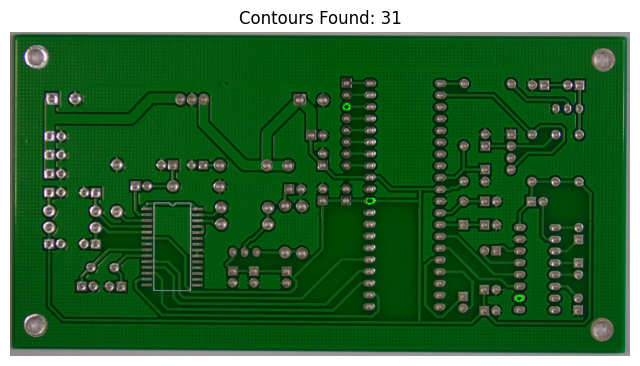

In [5]:
# 24-10-2025
# Show a Sample Visualization
sample_mask = os.path.join(masks_dir, "Missing_hole", "01_missing_hole_01_mask.jpg")
sample_image = os.path.join(defect_images_dir, "Missing_hole", "01_missing_hole_01.jpg")
output_sample_dir = os.path.join(roi_output_dir, "Missing_hole")

vis_result, sample_contours = extract_rois(sample_mask, sample_image, output_sample_dir)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB))
plt.title(f"Contours Found: {len(sample_contours)}")
plt.axis('off')
plt.show()
